In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, tree
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import kagglehub
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris


# **Load data**

In [ ]:
downlod_data = kagglehub.dataset_download('sameepvani/nasa-nearest-earth-objects')
read_data = pd.read_csv("/root/.cache/kagglehub/datasets/sameepvani/nasa-nearest-earth-objects/versions/2/neo.csv")
data = pd.DataFrame(read_data)
data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [ ]:
data.drop(['id' , 'name'], axis= 1, inplace=True)

# **Encoder**

In [ ]:
for column in ['orbiting_body', 'sentry_object', 'hazardous']:
    data[column] = pd.Categorical(data[column]).codes

# **Balance target**

In [ ]:
smote = SMOTE()
data_balance, target_balance = smote.fit_resample(data,data['hazardous'])
data_balance['hazardous'] = target_balance

In [ ]:
data_analyses , test_data = train_test_split(data_balance , test_size = 0.1)

# **Check data**

In [ ]:
data_analyses.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
count,147592.000000,147592.000000,147592.000000,1.475920e+05,147592.0,147592.0,147592.000000,147592.000000
mean,0.200728,0.448841,54138.660278,3.834999e+07,0.0,0.0,22.092868,0.500793
std,0.282160,0.630929,25306.758975,2.183609e+07,0.0,0.0,2.779300,0.500001
min,0.000609,0.001362,203.346433,6.745533e+03,0.0,0.0,9.230000,0.000000
25%,0.040230,0.089958,35323.189414,1.940090e+07,0.0,0.0,20.200000,0.000000
50%,0.148336,0.331689,51194.227306,3.925578e+07,0.0,0.0,21.300000,1.000000
75%,0.253340,0.566485,69287.246846,5.742973e+07,0.0,0.0,24.100000,1.000000
max,37.892650,84.730541,228242.243467,7.479865e+07,0.0,0.0,33.200000,1.000000


In [ ]:
data_analyses.drop(['sentry_object', 'orbiting_body'] , axis = 1 , inplace = True)

# **Copy data to remove noise**

In [ ]:
data_noise = data_analyses

<ipython-input-33-88a5f352e161>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.absolute_magnitude, palette=['#900C3F'], ax = ax2)


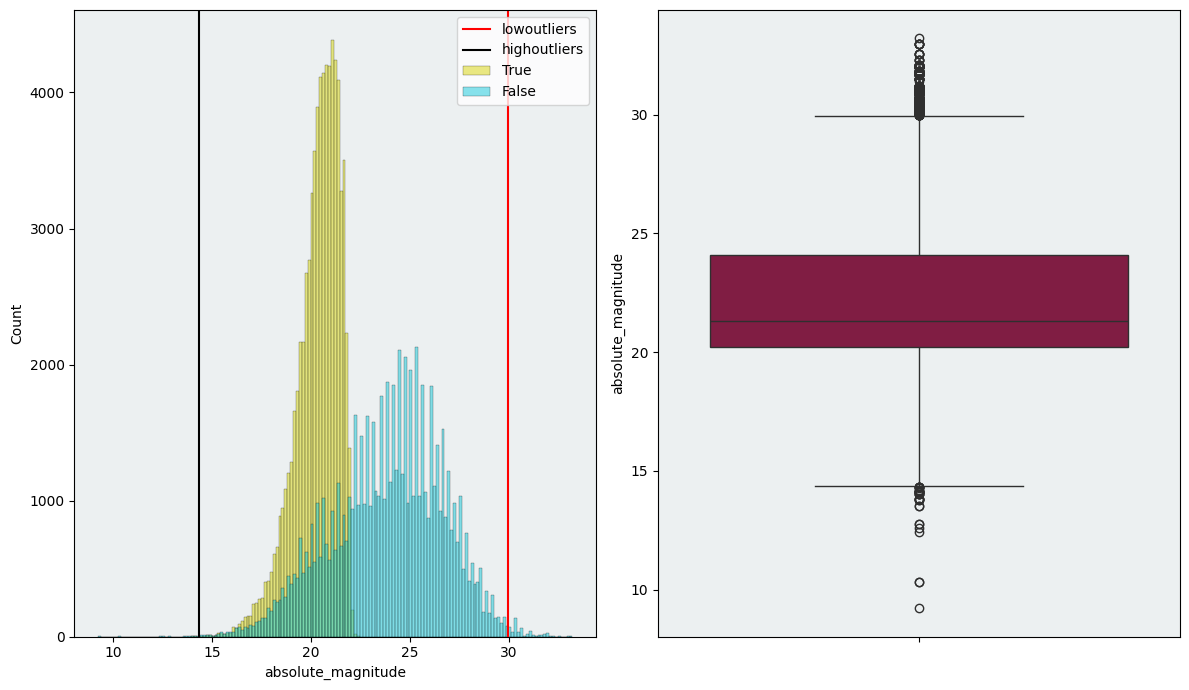

In [ ]:
lowoutliers  = data_analyses.absolute_magnitude.quantile(0.75) + (data_analyses.absolute_magnitude.quantile(0.75) - data_analyses.absolute_magnitude.quantile(0.25)) * 1.5
highoutliers = data_analyses.absolute_magnitude.quantile(0.25) - (data_analyses.absolute_magnitude.quantile(0.75) - data_analyses.absolute_magnitude.quantile(0.25)) * 1.5
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'absolute_magnitude' , hue = 'hazardous', palette=['#13c9db', '#d8d508'], ax = ax1)
plt.gca().set_facecolor('#f0f0f0')
ax1.axvline(x = lowoutliers, color='red')
ax1.axvline(x = highoutliers, color='black')
sns.boxplot(data_analyses.absolute_magnitude, palette=['#900C3F'], ax = ax2)
ax1.legend(['lowoutliers', 'highoutliers', 'True' , 'False'])
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.tight_layout()
plt.show()

In [ ]:
data_noise = data_noise[data_noise['absolute_magnitude']<= lowoutliers]
data_noise = data_noise[data_noise['absolute_magnitude']>= highoutliers]

<ipython-input-35-a3e1c7c89281>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.miss_distance, palette=['#900C3F'], ax = ax2)


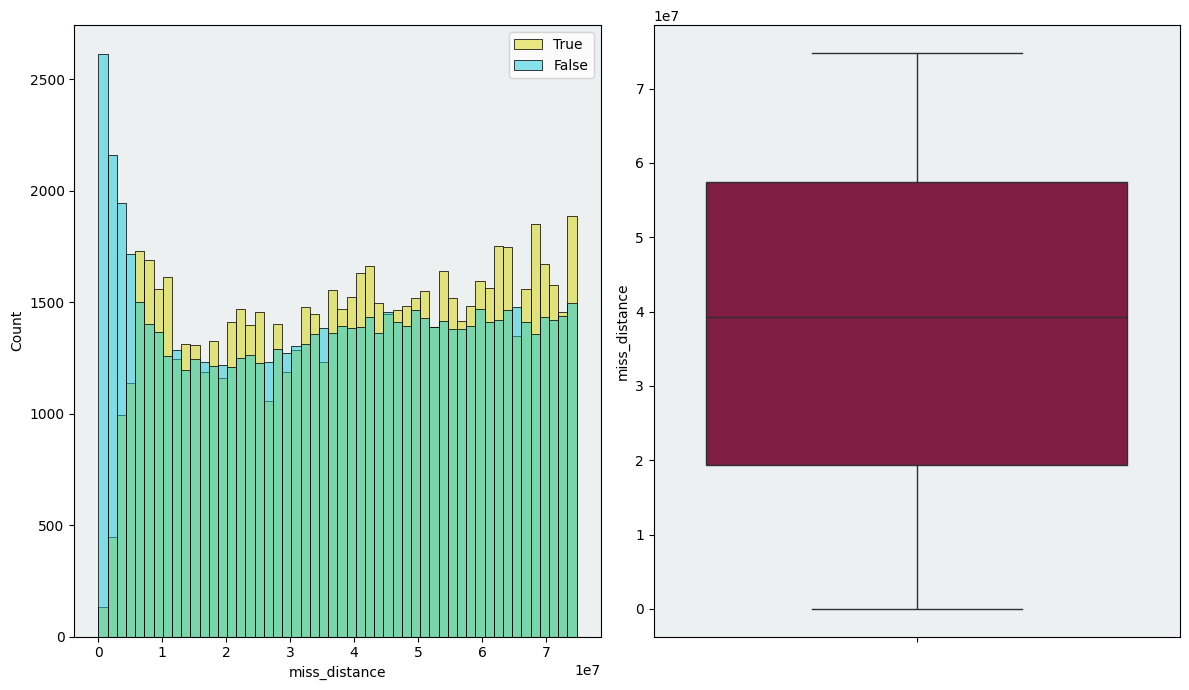

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'miss_distance' , hue = 'hazardous', palette=['#13c9db', '#d8d508'], ax = ax1)
sns.boxplot(data_analyses.miss_distance, palette=['#900C3F'], ax = ax2)
ax1.legend(['True' , 'False'])
plt.gca().set_facecolor('#ecf0f1')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

<ipython-input-36-dbc546b64b78>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.relative_velocity, palette=['#900C3F'], ax = ax2)


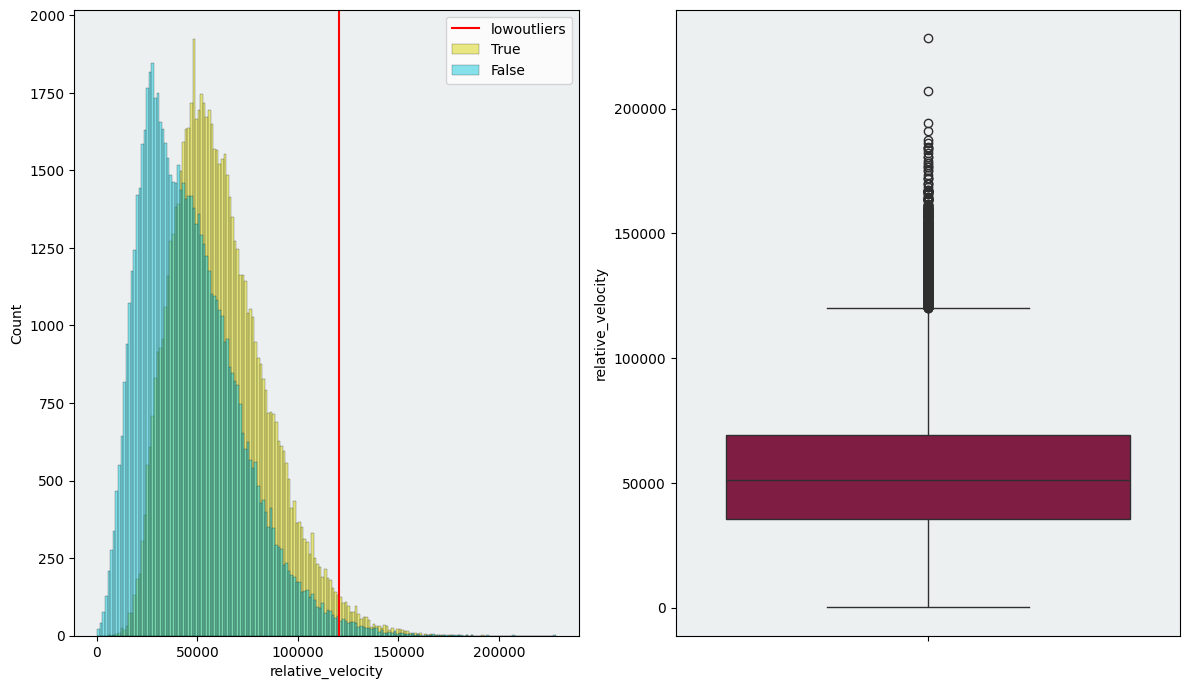

In [ ]:
lowoutliers2  = data_analyses.relative_velocity.quantile(0.75) + (data_analyses.relative_velocity.quantile(0.75) - data_analyses.relative_velocity.quantile(0.25)) * 1.5
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'relative_velocity', palette=['#13c9db', '#d8d508'], hue = 'hazardous' , ax = ax1)
ax1.axvline(x = lowoutliers2, color='red')
sns.boxplot(data_analyses.relative_velocity, palette=['#900C3F'], ax = ax2)
ax1.legend(['lowoutliers', 'True' , 'False'])
plt.gca().set_facecolor('#ecf0f1')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
data_noise = data_noise[data_noise['relative_velocity']<= lowoutliers2]

<ipython-input-38-1e14057732bd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.est_diameter_max, palette=['#900C3F'], ax = ax2)


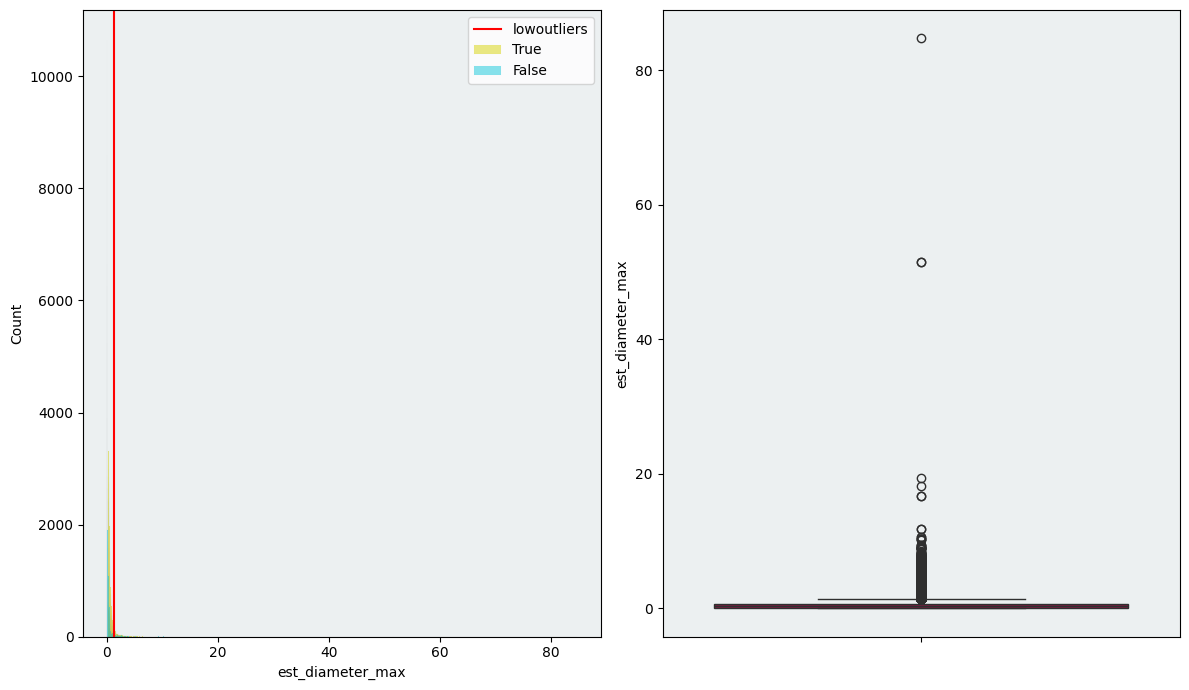

In [ ]:
lowoutliers3  = data_analyses.est_diameter_max.quantile(0.75) + (data_analyses.est_diameter_max.quantile(0.75) - data_analyses.est_diameter_max.quantile(0.25)) * 1.5
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'est_diameter_max' , hue = 'hazardous', palette=['#13c9db', '#d8d508'], ax = ax1)
ax1.axvline(x = lowoutliers3, color='red')
sns.boxplot(data_analyses.est_diameter_max, palette=['#900C3F'], ax = ax2)
ax1.legend(['lowoutliers', 'True' , 'False'])
plt.gca().set_facecolor('#ecf0f1')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
data_noise = data_noise[data_noise['est_diameter_max']<= lowoutliers3]

<ipython-input-40-acd25da8087a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.est_diameter_min, palette=['#900C3F'], ax = ax2)


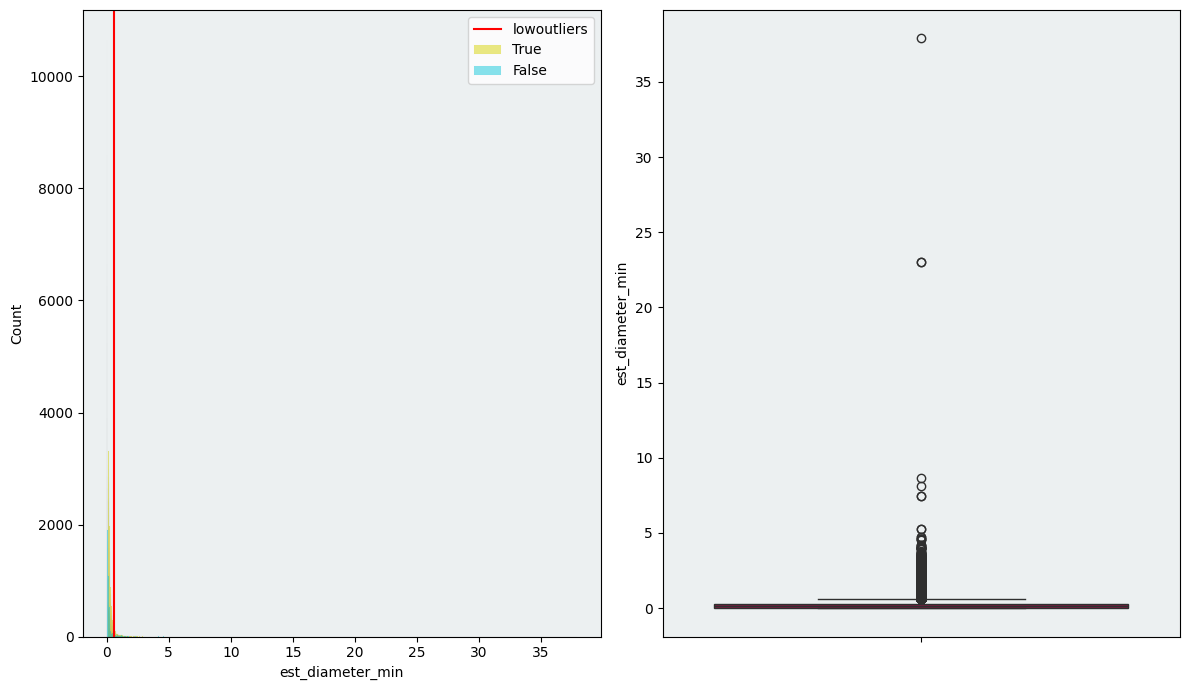

In [ ]:
lowoutliers4  = data_analyses.est_diameter_min.quantile(0.75) + (data_analyses.est_diameter_min.quantile(0.75) - data_analyses.est_diameter_min.quantile(0.25)) * 1.5
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'est_diameter_min' , hue = 'hazardous', palette=['#13c9db', '#d8d508'], ax = ax1)
ax1.axvline(x = lowoutliers4, color='red')
sns.boxplot(data_analyses.est_diameter_min, palette=['#900C3F'], ax = ax2)
ax1.legend(['lowoutliers', 'True' , 'False'])
plt.gca().set_facecolor('#ecf0f1')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
data_noise = data_noise[data_noise['est_diameter_min']<= lowoutliers4]

# **Pieplot for noise-free data**  ⏳


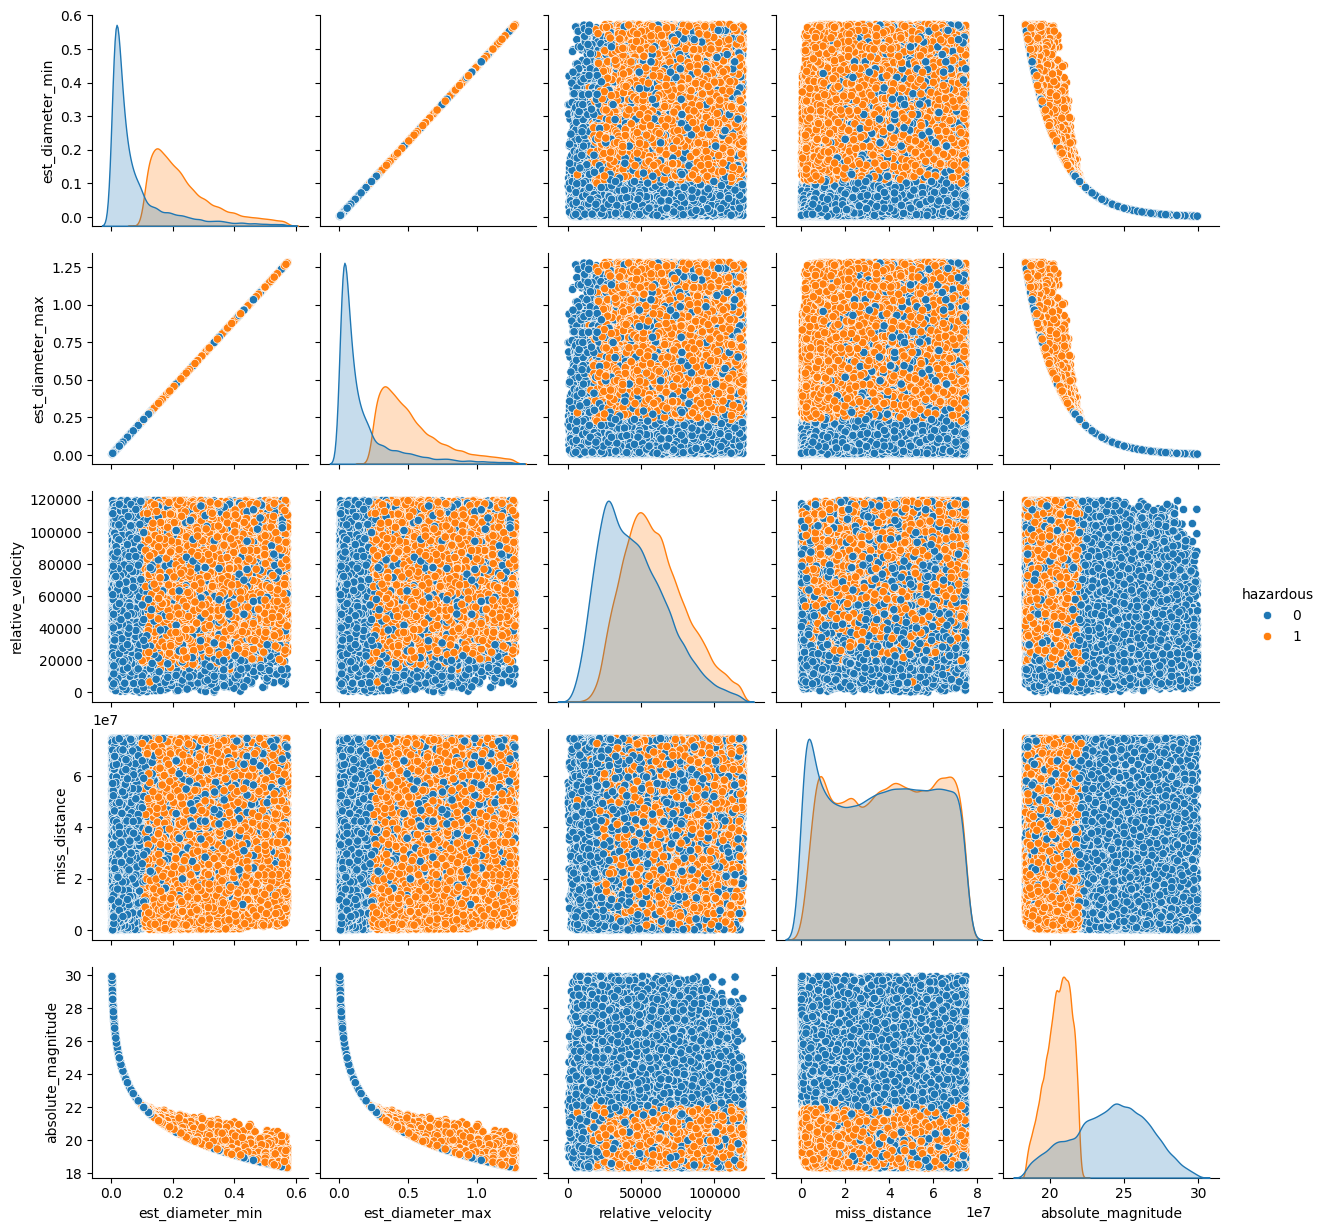

In [ ]:
sns.pairplot(data_noise , hue = 'hazardous')

# **Heat map**

<Axes: >

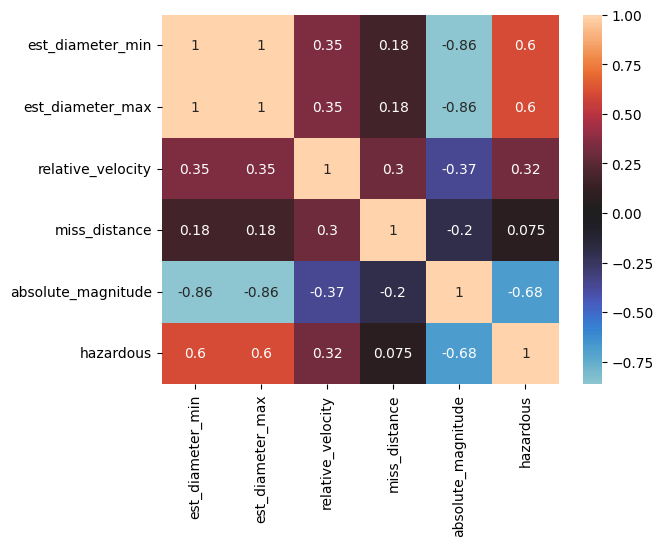

In [ ]:
sns.heatmap(data_noise.corr() , center = 0 , annot = True)

In [ ]:
data_noise.drop(['est_diameter_min'], axis=1, inplace=True)


# **Correlation of features**

In [ ]:
vifd = pd.DataFrame()
vifd['Feature'] = data_noise.columns
vifd['VIF'] = [variance_inflation_factor(data_noise.values, i) for i in range(data_noise.shape[1])]
display(vifd)

,Feature,VIF
0,est_diameter_max,4.064121
1,relative_velocity,7.432698
2,miss_distance,4.398862
3,absolute_magnitude,5.660611
4,hazardous,3.142426


# **Box plot based on classes**

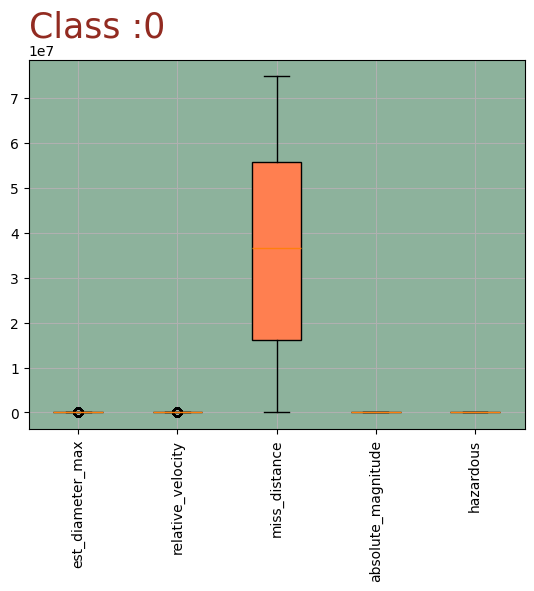

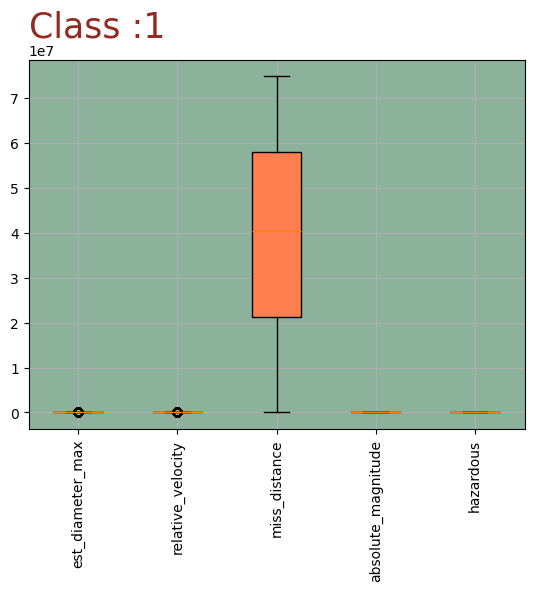

In [ ]:
groups = data_noise.groupby('hazardous')
for label, group in groups:
    box = plt.boxplot(group, patch_artist=True)
    colors = ['#229954', '#2e4053', '#FF7F50', '#c39bd3']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Class :'+ str(label), color= '#922b21', fontsize=25, loc='left')
    plt.xticks(rotation=90)
    plt.xticks([1, 2, 3, 4, 5], ['est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude', 'hazardous'])
    plt.gca().set_facecolor('#8db29c')
    plt.grid()
    plt.show()

In [ ]:
test_data.drop(['sentry_object', 'orbiting_body', 'est_diameter_min'] , axis = 1 , inplace = True)

# **train__teast**

In [ ]:
x_test, y_test = [test_data.drop(['hazardous', 'est_diameter_max', 'relative_velocity', 'miss_distance'],axis=1), test_data['hazardous']]
x_train, y_train = [data_noise.drop(['hazardous', 'est_diameter_max', 'relative_velocity', 'miss_distance'],axis=1), data_noise['hazardous']]

# **Algorithm KNN**

In [ ]:
modelKnn= KNeighborsClassifier(n_neighbors= 3)
modelKnn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = modelKnn.predict(x_test)

# **Check model Knn**

In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.9210365853658536


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8317
           1       0.91      0.93      0.92      8083

    accuracy                           0.92     16400
   macro avg       0.92      0.92      0.92     16400
weighted avg       0.92      0.92      0.92     16400



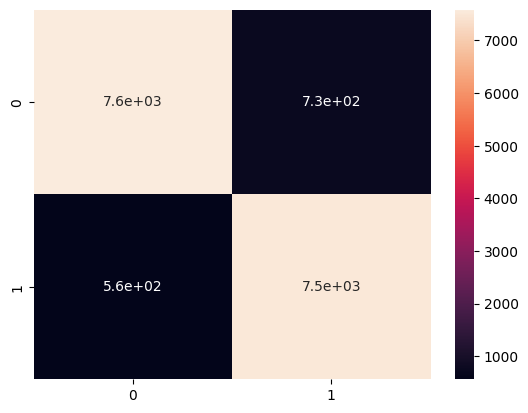

In [ ]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)
plt.show()

# **Algorithm Decisiontree**

In [ ]:
modeldetree = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, random_state= 0)
modeldetree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_tree = modeldetree.predict(x_test)

# **Check model decisiontree**

In [ ]:
print(accuracy_score(y_test, y_pred_tree))

0.8721951219512195


In [ ]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86      8317
           1       0.80      0.99      0.88      8083

    accuracy                           0.87     16400
   macro avg       0.89      0.87      0.87     16400
weighted avg       0.90      0.87      0.87     16400



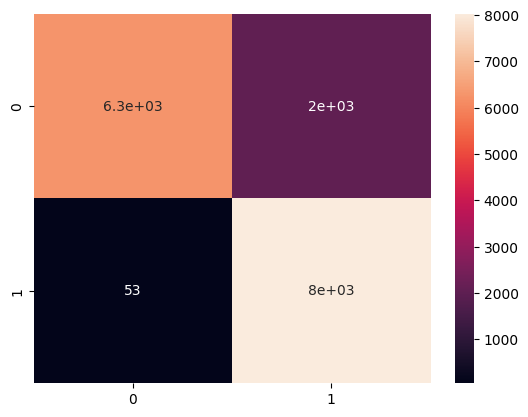

In [ ]:
cf1 = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf1, annot=True)
plt.show()

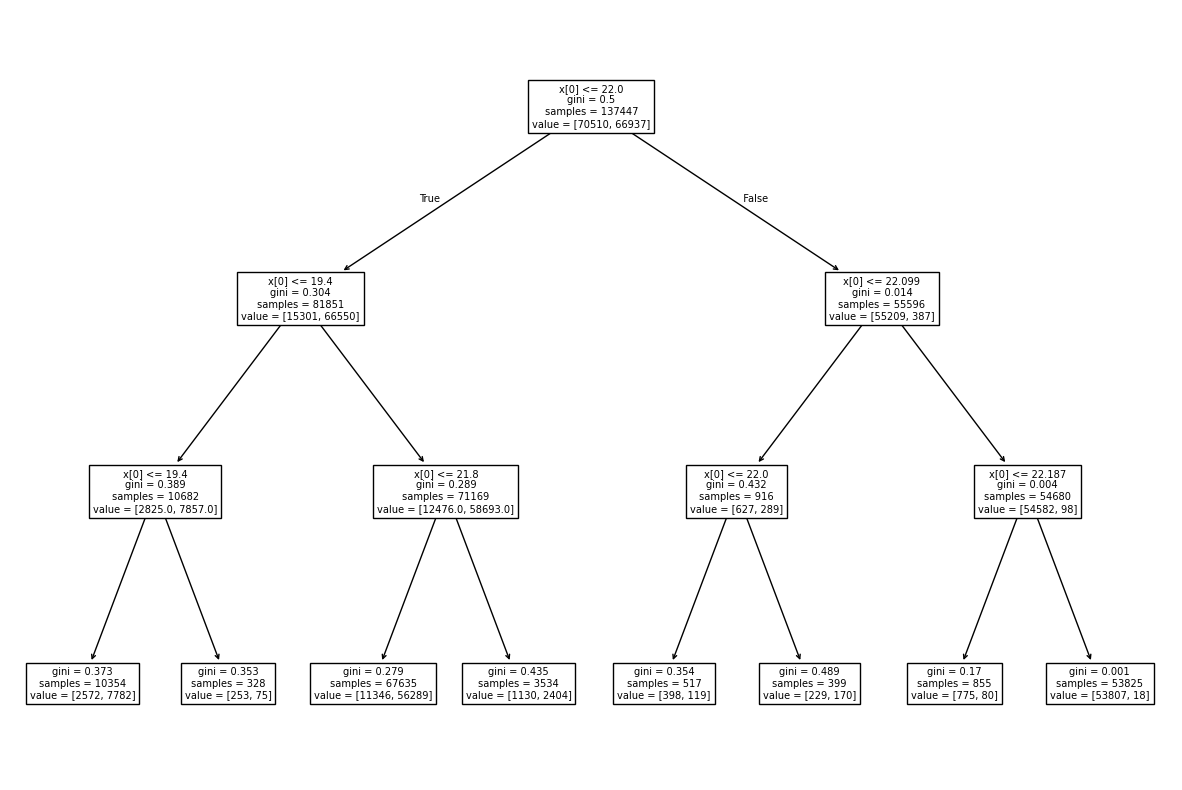

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(modeldetree)
plt.show()